# Konzept

Ziel ist es, aus den Fräsdaten Teilprojekt 1. eine Kraft-Ableitung anhand bestimmter Parameter vorzunehmen, um ggf. aufwendige Kraftmessungen umgehen zu können. 

Grundsätzlich wäre der Plan die Original-Daten in die Mongo-DB zu importieren, um dann weiter auf den Daten zu arbeiten.

1. Import in Mongo
2. Tatsächliche unter-Objektdaten in eine eigene Collection
3. Daten Bereinigen
4. Kraft-Schätzung berechnen
5. Kraftmessdaten hinzuziehen und mit Berechnung Vergleichen

# Aufbau

#### /notebooks

In diesem Ordner befinden sich die zur Analyse benötigten Jupyter-Notebooks. Das Setup.ipynb im Ordner /notebooks ist für die Initialisierung der Notebooks wichtig. Alle anderen Notebooks binden dieses ein.

Die Notebooks, die sich auf die Analyse der Daten spezialisieren, befinden sich im Verzeichnis

* /notebooks/data_compare

**Normalized_Cross_Correlation.ipynb**

Der Algorithmus, der die Normalisierte Kreuzkorrelation zwischen zwei Graphen berechnet, wird hier implementiert.

**Normalized_Cross_Correlation_Real_Data.ipynb**

Zeigt die Implementation des Normalized_Cross_Correlation.ipynb anhand eines Beispiels mit Echtdaten.

**Presentation.ipynb**

Hier befindet sich das Haupt-Analyse Notebook. Hier werden die verschiedenen Datensätze miteinander verglichen, auf Problematiken eingegangen und dokumentiert.

**Presentation_Test_Data.ipynb**

Zeigt die Visualisierungen und Berechnungen aus dem Notebook Presentation.ipynb aller Datensätze, die sich aktuell in der MongoDB befinden.

**Weitere:**

Die Notebooks in den Ordnern werden weiter unten genauer beschrieben.

* /notebooks/data_force_sensor
* /notebooks/data_machine

#### /src

Hier befinden sich einige für die Umsetzung notwendigen Bibliotheken und entwickelten Hilfsfunktionen. 

- Notebookloader: Um in den einzelnen Notebooks Zugriff auf andere Notebooks zu erhalten, wurde die Möglichkeit implementiert, andere Notebooks zu importieren. Damit erhält man die Möglichkeit, eine OOP-Artige Struktur aufbauen zu können. Damit die einzelnen Notebooks auf diese Funktionalität zugreifen können, muss die Setup.py im Root-Verzeichnis aufgerufen werden. (Siehe: https://jupyter-notebook.readthedocs.io/en/4.x/examples/Notebook/rstversions/Importing%20Notebooks.html)

- Zugriff auf Datenbank: Um einen einheitlichen Zugriff auf die Datenbank gewährleisten zu können, wurde diese Funktionalität gesammelt unter src/isac/database implementiert. Notebooks können auf diese Funktionen zugreifen, um eine Datenbank bzw. Collection ansprechen zu können.

- Projektkonfiguration: In src/isac/configuration befindet sich die Konfiguration, an der man das aktuell ausgewählte Projekt auswählen. Ändert man das gesetzte Projekt, hat das Auswirkungen auf Projektefunktionen, die in den verschiedenen Notebooks implementiert wurden. Möchte man mehrere Projekt auslesen, muss dazwischene diese Variable auf das jeweils gewünschte Projekt geändert werden. Diese Eigenschaft wird zum Beispiel beim Importieren aller Rohdaten verwendet (Ändere Projektname, Importiere Projekt, Ändere erneut Projektname, ...) 

#### /data

Hier befinden sich die relevanten Daten. 

* Projektdaten

Unter /data/projects kann ein Projekt abgelegt werden. Ein Projekt hat immer einen Projektnamen. Zum Beispiel "HMILL_1_1". In diesem Ordner befinden sich wiederum zwei Unterordner, force_sensor und machine. In diesen befinden sich die jeweiligen Daten in ihrem hinterlegten Dateiformat. Beispielaufbau:

```
|-- data
  |-- projects
    |-- HMILL_1_1 (<Projektname>)
      |-- force_sensor (Rohdaten)
        |-- FORCE_KONV_1_Nut2.txt
      |-- machine (Rohdaten)
        |-- TRACE_KONV_1_Nut2_roh.csv
```

Hinweis: Bei den uns vorliegenden Daten entsprachen die Namen der Rohdaten immer FORCE_KONV_1_Nut2.txt bzw. TRACE_KONV_1_Nut2_roh.csv, obwohl die Projektnamen unterschiedliche Namen hatten. Das kann zu Verwirrung führen. Bitte bei neuen Daten beachten. Eventuell müssen dann unter /notebooks/import_projects Änderungen durchgeführt werden.

Führt man anschließend das Notebook /notebooks/import_projects/Import_All_Projects.ipynb aus, so würde hiermit jedes Projekt mit dem jeweiligen Projektnamen in die MongoDB in 2 getrennte Collections importiert werden. (Force und Trace)

Beim Import werden die jeweilig benötigten Notebooks (data_force_sensor oder data_machine.import_data_to_database) ausgeführt, da beide Dateien ein unterschiedliches Format besitzen.

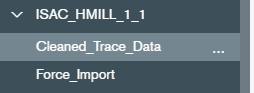

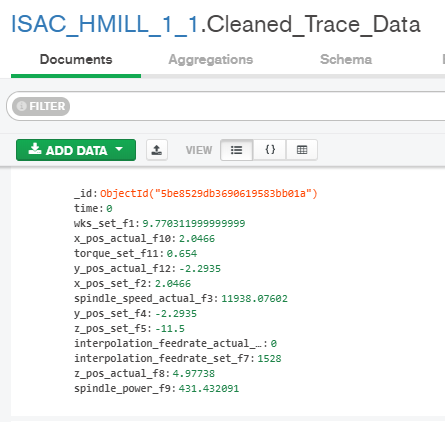

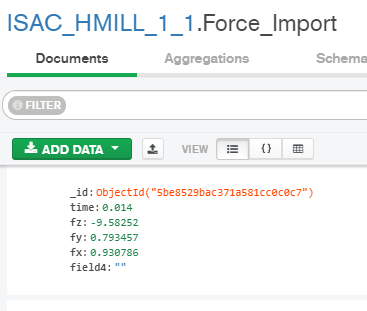

# Unterschiede beim Aufbau data_machine vs. data_force_sensor

Damit man einigermaßen generisch Daten importieren / visualisieren kann, wurden für die jeweiligen Import-Dateien jeweils eigene Notebooks zum Import bzw. zur Visualisierung in bzw. aus der MongoDB erstellt. Diese befinden sich an folgenden Orten:

* /notebooks/data_force_sensor/

* /notebooks/data_machine/

Es gibt für beide Formate immer jeweils ein zugehöriges Notebook für die drei Schritte Import, Bereinigung und Visualisierung.

Import: **import_data_to_database.ipynb**

Hier werden Duplikate (Wert hat sich seit letzten Zeitstempel), fehlende Werte und andere Fehler behoben und in die MongoDB importiert. Weitere Informationen sind in den jeweiligen Notebooks zu finden.

Bereinigung: **clean_data.ipynb**

Bei der Bereinigung werden die Rohdaten aus der MongoDB ausgelesen und weiterverarbeitet. Eventuell weitere benötigte Berechnungen werden hier durchgeführt. Zum Beispiel findet hier die Berechnung der virtuellen Kraft sowie ein benötigtes Resampling auf ein einheitlicheches Zeitintervall statt.

Visualisierung: **visualize_data.ipynb**

Zur Visualisierung werden die Unterschiedlichen Datentypen und Bezeichnungen der Werte ausgewertet und schlussendlich zu einer sich ähnelnden Visualisierung zusammengeführt.

# Automatische Befüllung der Datenbank

Wenn dieses Image in Kombination mit dem Image "Mongo-Seeder" gestartet wird, werden bereits importierte, im Image "Mongo-Seeder" vorhandene Datenkbanken importiert. Dadurch ist es nicht mehr notwendig, die Daten in diesem Image zu importieren. Damit man den Aufbau eines neuen Imports nachvollziehen kann, wurde beispielhaft im Ordner /data/projects ein Projekt hinterlegt. Sollten weitere Imports benötigt werden, kann man sich an diesem Aufbau orientieren.